# MACHINE LEARNING STEPS

1. Acquire Dataset
2. Load Dataset
3. Preprocess Dataset
4. Run Learning Algorithms
5. Evaluate Models
6. Improve on your models

![](ml_pipeline_large.png)

## House price prediction
![](cali.jpg)

## Spam Detection
![](data_format.png)

## Digit image classification
![](digits.png)

# IMPORT ALL NEEDED LIBRARIES

In [1]:
import pandas as pd
import sklearn
from skimage.feature import hog, canny
from sklearn.utils import shuffle
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import fetch_california_housing, load_boston
from sklearn.model_selection import ShuffleSplit, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
import numpy as np        
import pylab as plt
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression, LogisticRegression
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn import datasets, svm, metrics
from skimage.io import imread
%matplotlib inline

# REGRESSION: HOUSE PRICE PREDICTION

![](house.jpeg)


DATASET
=======
Boston Housing Data Set
containing 506 house prices
https://archive.ics.uci.edu/ml/datasets/Housing

Features:
=========

1. CRIM: per capita crime rate by town 
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
3. INDUS: proportion of non-retail business acres per town 
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
5. NOX: nitric oxides concentration (parts per 10 million) 
6. RM: average number of rooms per dwelling 
7. AGE: proportion of owner-occupied units built prior to 1940 
8. DIS: weighted distances to five Boston employment centres 
9. RAD: index of accessibility to radial highways 
10. TAX: full-value property-tax rate per 10,000 dollars
11. PTRATIO: pupil-teacher ratio by town 
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
13. LSTAT: Percentage lower status of the population 
14. MEDV: Median value of owner-occupied homes in 1000 dollars



In [2]:
# 1. VISUALIZE DATA
data = load_boston()

print("Features: %s" % data.feature_names)
X = data.data
y = data.target

df = pd.DataFrame(X, columns=data.feature_names)

# GET PRICE MEAN, MAX, MIN
print("Price mean %.3f" % np.mean(y))
print("Price max %.3f" % np.max(y))
print("Price min %.3f" % np.min(y))

# GET CRIME MEAN, MAX, MIN
feature = "CRIM"
print("%s mean %.3f" % (feature, df[feature].mean()))
print("%s max %.3f" % (feature, df[feature].max()))
print("%s min %.3f" % (feature,df[feature].min()))



Features: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Price mean 22.533
Price max 50.000
Price min 5.000
CRIM mean 3.594
CRIM max 88.976
CRIM min 0.006


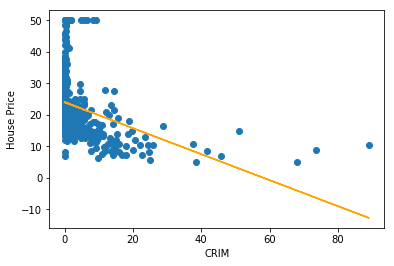

Coefficients: [-0.41277468]
Mean squared error: 71.85


In [3]:
# Compute correlations (try different columns)
df = pd.DataFrame(X, columns=data.feature_names)
feature = "CRIM"

# PLOT SCATTER POINTS
plt.scatter(df[feature], y)

# Fit linear regression line
clf = LinearRegression()

Xi = df[[feature]]
#TRAIN MODEL USING SPECIFIED FEATURE
clf.fit(Xi, y)

# PLOT LINEAR MODEL
plt.plot(Xi, clf.predict(Xi), color="orange") 
plt.xlabel("%s" % feature)
plt.ylabel("House Price")
plt.show()

# The coefficients
print('Coefficients: %s' % clf.coef_)

# The mean squared error
print("Mean squared error: %.2f" % 
      np.mean((clf.predict(Xi) - y) ** 2))



![](scikit-learn-flow-chart.jpg)

# TRAIN AN ALGORITHM TO PREDICT HOUSE PRICES

Linear Regression MSE 28.069


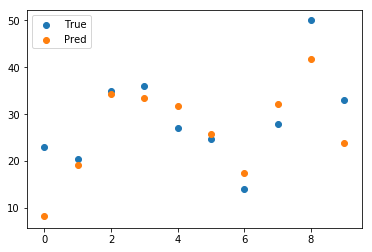

In [4]:
# 2. TRAIN and Evaluate ALGORITHMS

# PREPROCESS DATA (Z-scale your date)
X = np.array(df)
X = (X-X.mean(axis=0))/X.std(axis=0)

# SPLIT DATA INTO TRAINING AND TESTING
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

# GATHER A SET OF MODELS
clf = LinearRegression()

# SEE HOW THE MODEL PERFORMS ON THE TEST SET
clf.fit(Xtrain, ytrain)
y_pred = clf.predict(Xtest)

mse = ((y_pred - ytest)**2).mean()
print "Linear Regression MSE %.3f" % (mse)

plt.scatter(np.arange(10), ytest[:10], label="True")
plt.scatter(np.arange(10), y_pred[:10], label="Pred")
plt.legend()
plt.show()

print "=================="
    




Decision Tree MSE 20.175


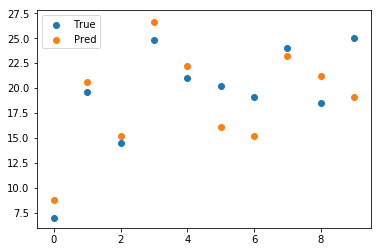

Nearest Neighbor MSE 24.851


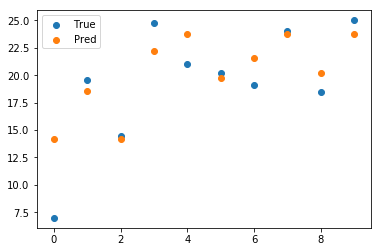

Random Forests MSE 14.019


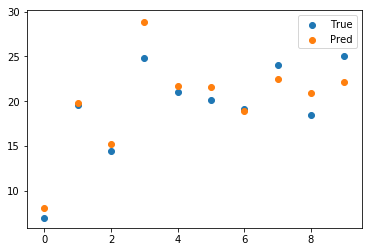

Neural Networks MSE 16.686


/home/wunderkind/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


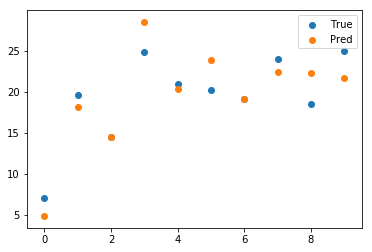

Linear Regression MSE 26.020


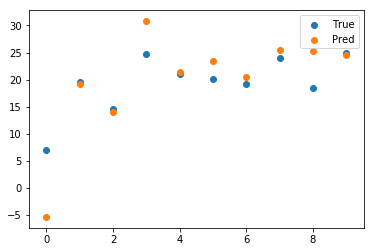

In [5]:
# 2. TRAIN and Evaluate ALGORITHMS

# PREPROCESS DATA (Z-scale your date)
X = np.array(df)
X = (X-X.mean(axis=0))/X.std(axis=0)

# SPLIT DATA INTO TRAINING AND TESTING
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

# GATHER A SET OF MODELS
models = {"Nearest Neighbor":KNeighborsRegressor(n_neighbors=2),
          "Linear Regression":LinearRegression(),
          "Decision Tree": DecisionTreeRegressor(),\
          "Random Forests": RandomForestRegressor(n_estimators=100),
          "Neural Networks": MLPRegressor(hidden_layer_sizes=(200,), max_iter=1000)
         }

# SEE HOW EACH PERFORMS ON THE TEST SET
for model in models:
    clf = models[model]
    clf.fit(Xtrain, ytrain)
    y_pred = clf.predict(Xtest)
    
    mse = ((y_pred - ytest)**2).mean()
    print "%s MSE %.3f" % (model, mse)
    
    plt.scatter(np.arange(10), ytest[:10], label="True")
    plt.scatter(np.arange(10), y_pred[:10], label="Pred")
    plt.legend()
    plt.show()
    
    print "=================="
    


# CALIFORNIA HOUSING PRICE PREDICTION

![](cali.jpg)
http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

Goal
----
This is a different datast. Find a sklearn algorithm that performs best on the testing set.


FEATURES
--------

1. 'MedInc'
2. 'HouseAge'
3. 'AveRooms'
4. 'AveBedrms'
5. 'Population'
6. 'AveOccup'
7. 'Latitude'
8. 'Longitude'

In [6]:
# QUICK EXERCISE
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
X = data.data
y = data.target

# PREPROCESS DATA (Z-scale)


# SPLIT DATA INTO TRAINING AND TESTING


# TRAIN DIFFERENT MODELS


# EVALUATE MODEL

# REPORT WHICH MODEL IS BEST


# BACK TO THE BOSTON HOUSING PRICE PREDICTION

## Cross-validation - 10-fold

In [7]:
# Cross-validation - 10fold
data = load_boston()

X = data.data
X = (X-X.mean(axis=0))/X.std(axis=0)
y = data.target

# SPLIT DATA -CROSS VALIDATION
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True)

# TRAIN MODEL
clf = KNeighborsRegressor(n_neighbors=2)

mse = 0
for train, test in kf.split(X):
    clf.fit(X[train], y[train])
    y_pred = clf.predict(X[test])

    mse += ((y_pred - y[test])**2).mean()

print "KNN MSE %.3f" % (mse / float(n_splits))


KNN MSE 21.062


In [8]:
# Cross-validation - randomsplit
data = load_boston()
X = data.data
X = (X-X.mean(axis=0))/X.std(axis=0)
y = data.target

# SPLIT DATA -CROSS VALIDATION
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

# TRAIN MODEL
clf = KNeighborsRegressor(n_neighbors=2)

mse = 0

clf.fit(Xtrain, ytrain)
y_pred = clf.predict(X[test])

mse = ((y_pred - y[test])**2).mean()

print "KNN MSE %.3f" % (mse)


KNN MSE 5.665


# FINDING THE BEST PARAMETER

In [9]:
# GRID SEARCH
data = load_boston()

X = data.data
X = (X-X.mean(axis=0))/X.std(axis=0)
y = data.target

# SPLIT DATA -CROSS VALIDATION
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True)

# TRAIN MODEL (Exercise: Try with KNN)
for n_estimators in [1,2,5,10,20]:
    clf = RandomForestRegressor(n_estimators=n_estimators)
    
    mse = 0
    for train, test in kf.split(X):
        clf.fit(X[train], y[train])
        y_pred = clf.predict(X[test])

        mse += ((y_pred - y[test])**2).mean()

    print "RF with %d neighbors MSE %.3f" % (n_estimators, mse / float(n_splits))


RF with 1 neighbors MSE 27.132
RF with 2 neighbors MSE 16.357
RF with 5 neighbors MSE 13.441
RF with 10 neighbors MSE 11.237
RF with 20 neighbors MSE 12.054


# SHOW HOW INCREASING SAMPLE IMPROVES TEST

## SANITY CHECK

32.9478774331
23.722547293
21.9683030167
21.627115244
21.6840544156
21.5879740403
21.2907933977


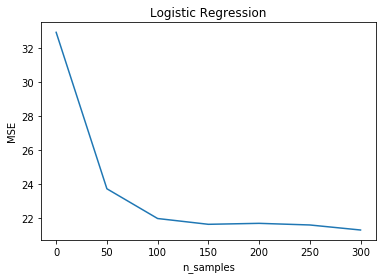

In [10]:
# Samples
data = load_boston()

X = data.data
X = (X-X.mean(axis=0))/X.std(axis=0)
y = data.target

clf = LinearRegression()
X, y = shuffle(X, y)
cutoff = 400
X = (X-X.mean(axis=0))/X.std(axis=0)
Xtrain, ytrain = X[:cutoff], y[:cutoff]
Xtest, ytest = X[cutoff:], y[cutoff:]

test_mse = []

for i in range(50, cutoff, 50):
    Xs, ys = Xtrain[:i], ytrain[:i]
    
    clf.fit(Xs, ys)
    
    y_pred = clf.predict(Xtest)
    mse_test = ((y_pred - ytest)**2).mean()
    print mse_test
    test_mse += [mse_test]
    
plt.plot(np.arange(len(test_mse))*50, test_mse)
plt.xlabel("n_samples")
plt.ylabel("MSE")
plt.title("Logistic Regression")
plt.show()

# SHOW HOW SOME ALGORITHMS ARE SENSITIVE TO NOISE

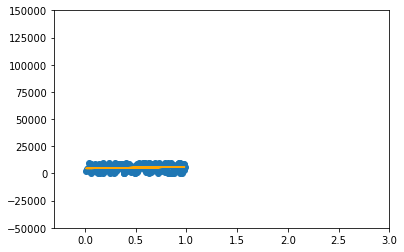

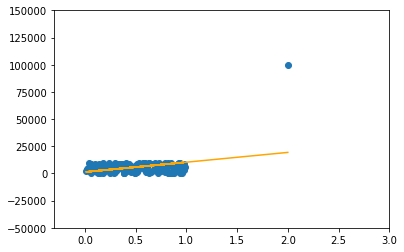

In [11]:
## NOISY DATA POINTS
X = np.random.rand(200, 1)
y = np.random.rand(200) * 1e4

plt.scatter(X, y)

clf = LinearRegression()
clf.fit(X, y)
plt.plot(X, clf.predict(X), color="orange")
plt.xlim([-0.3, 2.0+1.0])
plt.ylim([-1e5/2, 1e5+1e5/2])
plt.show()

X[-1] = 2.0
y[-1] = 1e5

plt.scatter(X, y)

clf.fit(X, y)
plt.plot(X, clf.predict(X), color="orange")
plt.xlim([-0.3, 2.0+1.0])
plt.ylim([-1e5/2, 1e5+1e5/2])
plt.show()

# EXERCISE: COMPUTE TRAIN SCORES
#print("Test Score: %.3f") 

# EXERCISE: WHICH MODEL IS MORE ROBUST TO NOISE ? 
# (CHANGE MODEL ABOVE)
# LINKS TO MODELS: http://scikit-learn.org/stable/supervised_learning.html

# FIND BEST FEATURES FOR PREDICTION

In [12]:
# MOST INFLUENTIAL FEATURES
data = load_boston()

X = data.data
X = (X-X.mean(axis=0))/X.std(axis=0)
y = data.target

# SPLIT DATA
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

clf = RandomForestRegressor()

for i in range(X.shape[1]):
    clf.fit(Xtrain[:, [i]], ytrain)
    yhat = clf.predict(Xtest[:, [i]])

    mse = ((yhat - ytest)**2).mean()

    print "%d - FEATURE %s - MSE %.3f" % (i, data.feature_names[i], mse)

0 - FEATURE CRIM - MSE 101.953
1 - FEATURE ZN - MSE 73.261
2 - FEATURE INDUS - MSE 54.709
3 - FEATURE CHAS - MSE 84.939
4 - FEATURE NOX - MSE 46.454
5 - FEATURE RM - MSE 59.405
6 - FEATURE AGE - MSE 105.162
7 - FEATURE DIS - MSE 87.137
8 - FEATURE RAD - MSE 69.008
9 - FEATURE TAX - MSE 61.208
10 - FEATURE PTRATIO - MSE 54.530
11 - FEATURE B - MSE 106.838
12 - FEATURE LSTAT - MSE 50.714


# COMBINE A SET OF ALGORITHMS TO MAKE A PREDICTION

In [13]:
# Ensemble Learning
X = np.array(df)
X = (X-X.mean(axis=0))/X.std(axis=0)
y = data.target
np.random.seed(0)

n_splits = 10
kf = KFold(n_splits=n_splits, random_state=2, shuffle=True)

# QUICK EXERCISE ADD MODELS
models = {"Nearest Neighbor":KNeighborsRegressor(n_neighbors=2),
          "Linear Regression":LinearRegression(),
          "Decision Tree": DecisionTreeRegressor(),
          "Random Forests": RandomForestRegressor(n_estimators=100),
          "Neural Networks": MLPRegressor(hidden_layer_sizes=(200,), max_iter=1000)
         }

for model in models:
    clf = models[model]
    
    mse = 0
    for train, test in kf.split(X):
        clf.fit(X[train], y[train])
        y_pred = clf.predict(X[test])
        
        mse += ((y_pred - y[test])**2).mean()
        
    
    print "%s MSE %.3f" % (model, mse / float(n_splits))


# ENSEMBLE
print("\nTraining ENSEMBLE")
mse = 0
for train, test in kf.split(X):
    y_pred = 0.
    for model in models:
        clf = models[model]
        clf.fit(X[train], y[train])
        y_pred += clf.predict(X[test])
    
    y_pred /= len(models)
    mse += ((y_pred - y[test])**2).mean()


print "Ensemble MSE %.3f" % (mse / float(n_splits))
    

Decision Tree MSE 20.439
Nearest Neighbor MSE 16.979
Random Forests MSE 10.052
Neural Networks MSE 12.321
Linear Regression MSE 23.358

Training ENSEMBLE
Ensemble MSE 9.913


# TRY THE ENSEMBLE LEARNIN METHOD ON THE CALIFORNIA HOUSING PROBLEM


In [14]:
# Ensemble Learning
data = fetch_california_housing()
X = data.data
y = data.target

# Z-scale data
X = (X-X.mean(axis=0))/X.std(axis=0)

# SPLIT DATA
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

# QUICK EXERCISE ADD MODELS
models = {"Nearest Neighbor":KNeighborsRegressor(n_neighbors=2)}

for model in models:
    clf = models[model]

    clf.fit(Xtrain, ytrain)
    ypred = clf.predict(Xtest)
    mse = ((ypred - ytest)**2).mean()
        
    
    print "%s MSE %.3f" % (model, mse)


# ENSEMBLE
print("\nTraining ENSEMBLE")

y_pred = 0
for model in models:
    clf = models[model]
    clf.fit(Xtrain, ytrain)
    y_pred += clf.predict(X[test])

y_pred /= len(models)
mse = ((y_pred - y[test])**2).mean()


print "Ensemble MSE %.3f" % (mse)

# EXERCISE: IMPROVE ALGORITHM EVALUATION ACCURACY WITHOUT 10Fold

Nearest Neighbor MSE 0.491

Training ENSEMBLE
Ensemble MSE 0.323


# CLASSIFICATION: SPAM DETECTION

DATASET
=======

https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection


5574 messages classified into spam and non-spam

GOAL
====

Build classifier that can classify messages into spam and non-spam

In [15]:
# 1. LOAD SPAM DATASET
messages = pd.read_csv("SMSSpamCollection", sep="\t", 
                       names=["label", "message"])

# 2. print head
print(messages.head())

# 2.5 Change class label to a more meaningful name
messages["label"][messages["label"]=="ham"] = "not_spam"

print(messages.head())

# 3. Length of each message
messages['length'] = messages['message'].map(lambda text: len(text))
print("\nLength of each message")
print(messages[["message","length"]].head())

# 4. GET SHAPE
print("\nn_samples: %d" % messages.shape[0])



  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
      label                                            message
0  not_spam  Go until jurong point, crazy.. Available only ...
1  not_spam                      Ok lar... Joking wif u oni...
2      spam  Free entry in 2 a wkly comp to win FA Cup fina...
3  not_spam  U dun say so early hor... U c already then say...
4  not_spam  Nah I don't think he goes to usf, he lives aro...

Length of each message
                                             message  length
0  Go until jurong point, crazy.. Available only ...     111
1                      Ok lar... Joking wif u oni...      29
2  Free entry in 2 a wkly comp to win FA Cup fina...     155


In [16]:
messages.groupby("label")["length"].mean()["not_spam"]

71.558963730569943

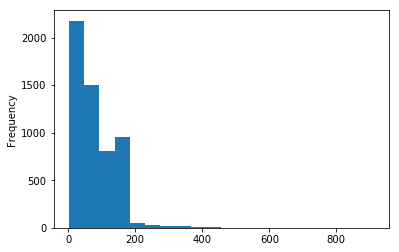

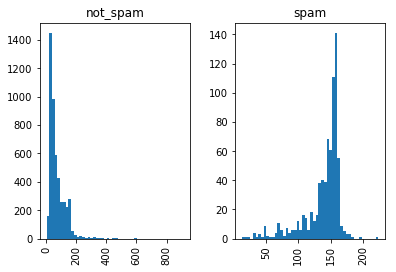

In [17]:
# STATS ON LENGTH
messages.length.plot(bins=20, kind='hist')
messages.hist(column='length', by='label', bins=50)
plt.show()



In [18]:
# QUICK MODEL (MEAN LENGTH)
ns_mean = messages.groupby("label")["length"].mean()["not_spam"]
s_mean = messages.groupby("label")["length"].mean()["spam"]

# GET MEANS
def predict(msg_test):
    text = np.array(msg_test["message"])
    text_lengths = np.array(map(len, text))
    
    ypred = np.zeros(text_lengths.shape[0]).astype(object)
    ypred[np.abs(text_lengths - ns_mean) > np.abs(text_lengths - s_mean)] = "not_spam"
    ypred[np.abs(text_lengths - ns_mean) <= np.abs(text_lengths- s_mean)] = "spam"
    
    return ypred

# GET ACCURACY
ypred = predict(messages)
y = messages["label"]

print "Classification Score: %.3f" % (ypred == y).mean()


Classification Score: 0.200


In [19]:
# HOW TO TRAIN A LEARNING ALGORITHM ON THIS ?


In [20]:
# SMALL DOCUMENT
documents = [
    'This is the the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
]
vec = CountVectorizer()
X = vec.fit_transform(documents).toarray()
# print(vec.get_feature_names())
# print(X)
print(pd.DataFrame(X, columns=vec.get_feature_names()))



   and  document  first  is  one  second  the  third  this
0    0         1      1   1    0       0    2      0     1
1    0         1      0   1    0       2    1      0     1
2    1         0      0   0    1       0    1      1     0
3    0         1      1   1    0       0    1      0     1


In [21]:
# APPLY IT ON THE SPAM DATASET
# 1. LOAD SPAM DATASET
messages = pd.read_csv("SMSSpamCollection", sep="\t", 
                       names=["label", "message"])



# 2.5 Change class label to a more meaningful name
messages["label"][messages["label"]=="ham"] = "not_spam"
# 2. print head
print(messages.head())

# DATA PREPROCESSING
vec = CountVectorizer()
X = vec.fit_transform(messages["message"]).toarray()
y = messages["label"]

# SPLIT SET INTO TRAINING AND TESTING
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)


# CLASSIFICATION ALGORITHM
spam_detector = MultinomialNB()
spam_detector.fit(Xtrain, ytrain)

ypred = spam_detector.predict(Xtest)

# EVALUATE
print("Test error %.3f" % (ytest == ypred).mean())


print('\nConfusion matrix\n')
print(pd.crosstab(ypred, ytest))



      label                                            message
0  not_spam  Go until jurong point, crazy.. Available only ...
1  not_spam                      Ok lar... Joking wif u oni...
2      spam  Free entry in 2 a wkly comp to win FA Cup fina...
3  not_spam  U dun say so early hor... U c already then say...
4  not_spam  Nah I don't think he goes to usf, he lives aro...
Test error 0.980

Confusion matrix

label     not_spam  spam
row_0                   
not_spam      1181     9
spam            19   184


# 20NEWSGROUPS 
![](class.jpg)

GOAL
====

CLASSIFY DOCUMENTS BASED ON CATEGORY

CATEGORIES
==========
![](classes.png)

In [22]:
# QUICK EXERCISE
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()

# PREPROCESS DATA

# SPLIT DATA INTO TRAINING AND TESTING

# TRAIN MODEL

# EVALUATE MODEL

# WHICH WORDS ARE MOST INFLUENTIAL ?

# MNIST DATASET

![](digits.png)
GOAL
====
Predict the right digit shown in the image

FEATURES
========
Gray pixels




(1797, 64)


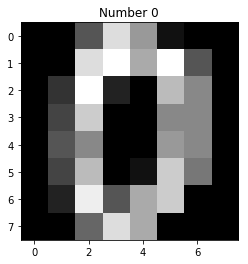

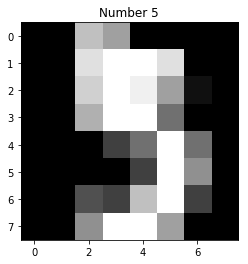

In [23]:
# LOAD THE DATASET
digits = datasets.load_digits()

X = digits.data
y = digits.target

# GET DATASET SHAPE
print(X.shape)

# RESHAPE DATA TO IMAGES
Xr = np.reshape(X, (X.shape[0], 8, 8))

# PLOT SOME IMAGES
plt.imshow(Xr[0], cmap="gray")
plt.title("Number %d" % y[0])
plt.show()

plt.imshow(Xr[5], cmap="gray")
plt.title("Number %d" % y[5])
plt.show()

# QUICK EXERCISE PLOT OTHER NUMBERS



0.946666666667
col_0   0   1   2   3   4   5   6   7   8   9
row_0                                        
0      42   0   0   0   0   0   0   0   0   0
1       0  45   0   1   0   0   0   0   3   1
2       0   0  47   0   0   0   0   0   0   0
3       0   0   0  42   0   2   0   3   1   0
4       0   2   0   0  36   0   0   0   1   1
5       0   0   0   0   0  52   0   0   0   0
6       0   0   0   0   0   0  42   0   1   0
7       0   0   0   0   0   0   0  48   1   0
8       0   2   0   0   0   0   0   0  38   0
9       0   0   0   1   0   1   0   1   2  34


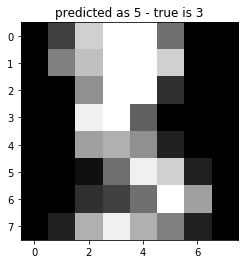

In [24]:
np.random.seed(2)

# LOAD THE DATASET
digits = datasets.load_digits()

X = digits.data
y = digits.target

# EXTRACT FEATURES 
# Exercise for later
# Xr = np.reshape(X, (X.shape[0], 8, 8))
# # func = lambda x, vis: hog(x, orientations=9, 
# #                           visualise=vis,
# #                           pixels_per_cell=(2, 2),
# #                           cells_per_block=(1, 1))
# # img = canny(Xr[0])
# # plt.imshow(img, cmap="gray")
# # plt.show()
# # plt.imshow(Xr[0], cmap="gray")
# # plt.show()
# # sas
# # X = np.array(map(lambda x: hog(x, orientations=9,
# #                           pixels_per_cell=(2, 2),
# #                           cells_per_block=(1, 1), list(Xr)))
# # X = np.reshape(X, (X.shape[0], -1))

# SPLIT DATA INTO TRAIN AND TEST
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

# TRAIN SVM ALGORITHM
clf = LogisticRegression()

# We learn the digits on the first half of the digits
clf.fit(Xtrain, ytrain)

# EVALUATE
ypred = clf.predict(Xtest)
print(ytest == ypred).mean()

print(pd.crosstab(ytest, ypred))


# Find these mistakes (Try for others)
indices = (ypred==5) & (ytest==3)

x_test = Xtest[indices][0]
y_test = ytest[indices][0]
plt.imshow(np.reshape(x_test, (8,8)), cmap="gray")
plt.title("predicted as %d - true is %d" % 
          (clf.predict([x_test]), y_test))
plt.show()

# Take Home Message


1. Acquire Dataset
2. Load Dataset
3. Preprocess Dataset
4. Run Learning Algorithms
5. Evaluate Models
6. Improve on your models

![](ml_pipeline_large.png)


![](scikit-learn-flow-chart.jpg)

http://scikit-learn.org/stable/supervised_learning.html